# Project Description


My name is Mohammad Abdus Samad. I am an analyst at a big online store. Together with the marketing department, I have to compile a list of hypotheses that may help boost revenue. 

# Project Goal

I need to prioritize these hypotheses, launch an A/B test, and analyze the results.

# Project Contents


-  <a href='#the_destination1'>Downloading the data and preparing it for analysis:</a>
-  <a href='#the_destination2'>Prioritizing Hypotheses:</a>
-  <a href='#the_destination3'>A/B Test Analysis:</a>
-  <a href='#the_destination4'>Overall Conclusion:</a>

<a id='the_destination1'></a>
# Step 1. Downloading the data and preparing it for analysis

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
from pandas import option_context

**Information for the "hypotheses" dataset:**

In [2]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.info()
display(hypotheses)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
with option_context('display.max_colwidth', 400):
    display(hypotheses.head(10))

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In the "hypotheses" dataset, there are 9 entries and one columns.

**Checking data types:**

In [4]:
hypotheses.dtypes

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object

In the "hypotheses" dataset, datatypes are objcet datatypes.

**Checking duplicates in the 'hypotheses' dataset:**

In [5]:
print(hypotheses.duplicated().sum())

0


There are no duplicate values.

**Checking missing values in the 'hypotheses' dataset:**

In [6]:
hypotheses.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

There are no missing values.

**Information for the "orders" dataset:**

In [7]:
try:
    orders = pd.read_csv('orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In the "orders" dataset, there are 1197 entries and five columns. Columns name are transactionId, visitorId, date, revenue and group.

**Checking data types:**

In [8]:
orders.dtypes

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object

in the "orders" dataset, "date" column is the object datatype. So we need to convert it from object to datetime.strptime type. 

**Changing data type in the "date" column:**

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

I converted "date" column from object to datetime.strptime type.

**Checking duplicates in the 'orders' dataset:**

In [10]:
print(orders.duplicated().sum())

0


There are no duplicate values in the "orders" dataset.

**Checking missing values in the 'orders' dataset:**

In [11]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

There are no missing values in the "orders" dataset.

**Information for the "visits" dataset:**

In [12]:
try:
    visits = pd.read_csv('visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv')
visits.info()
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In the "visits" dataset, there are 62 entries and three columns named date, group, visits.

**Checking data types:**

In [13]:
visits.dtypes

date      object
group     object
visits     int64
dtype: object

In the "visits" dataset, "date" column is the object datatype. So we need to convert it from object to datetime.strptime datatype.

**Changing data type in the "date" column:**

In [14]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

I converted "date" column from object to datetime.strptime type.

**Checking duplicates in the 'visits' dataset:**

In [15]:
print(visits.duplicated().sum())

0


There are no duplicate values in the "visits" dataset.

**Checking missing values in the 'visits' dataset:**

In [16]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

There are no missing values in the "visits" dataset.

-  In the "hypotheses" dataset, there are 9 entries and one columns. There are no missing values and duplicate values in the "hypotheses" dataset.
-  In the "orders" dataset, there are 1197 entries and five columns. Columns name are transactionId, visitorId, date, revenue and group.There are no missing values and duplicate values in the "orders" dataset.
-  In the "visits" dataset, there are 62 entries and three columns named date, group, visits. There are no missing values and duplicate values in the "visits" dataset.
-  In the "orders" and "visits" dataset, "date" column was object type. I converted both from object to datetime.strptime datatype.

<a id='the_destination2'></a>
# Step 2. Prioritizing Hypotheses

Testing a hypothesis will cost a lot of money, but our resources are limited. So we need to choose what to test and what to let go of. To try to ensure maximum growth of key business metrics, the hypotheses we have formulated have to be prioritized.
**ICE and RICE:**
- Impact, confidence, effort/ease (ICE) is one of the most popular ways of prioritizing problems: ICE score = (Impact * Confidence) / Effort.
-  There's also a modified version, RICE: RICE score = (Reach * Impact * Confidence) / Effort. 
-  RICE has four components:
Reach — how many users will be affected by the update you want to introduce.
Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product.
Confidence — how sure you are that your product will affect them in this way.
Effort — how much will it cost to test the hypothesis

**Applying the ICE framework to prioritize hypotheses and sorting in descending order of priority:**

In [17]:
hypotheses ['ICE'] = hypotheses ['Impact'] * hypotheses ['Confidence'] / hypotheses ['Effort'] 
print(hypotheses [['Hypothesis', 'ICE']].sort_values(by= 'ICE', ascending = False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


ICE gives the more promising hypotheses are "Launch a promotion that gives users discounts on their birthdays", "Add two new channels for attracting traffic. This will bring 30% more users", "Add a subscription form to all the main pages. This will help you compile a mailing list" .

**Applying the RICE framework to prioritize hypotheses and sorting in descending order of priority:**

In [18]:
hypotheses ['RICE'] = hypotheses ['Reach'] * hypotheses ['Impact'] * hypotheses ['Confidence'] / hypotheses ['Effort']  
print(hypotheses [['Hypothesis', 'RICE']].sort_values(by= 'RICE', ascending = False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


RICE gives the more promising hypotheses are "Add a subscription form to all the main pages. This will help you compile a mailing list", "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size", "Add two new channels for attracting traffic. This will bring 30% more users" and "Show banners with current offers and sales on the main page. This will boost conversion".

-  We calculated for the RICE and ICE for prioritizing hypotheses. We see after calculating RICE the hpothesis "Add a subscription form to all the main pages. This will help you compile a mailing list" is in the first place. That's because of the Reach parameter is 10 while the other hypotheses have lower values.
-  Apart from how strong the hypothesis is, take into account how many users it will affect.

**Scatter chart compariosn for ICE & RICE:**

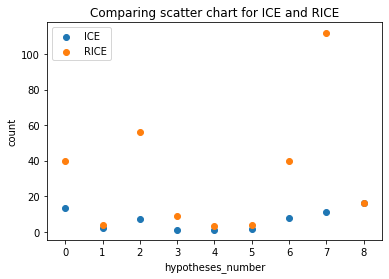

In [19]:
ICE_values = pd.Series(range(0, len(hypotheses['ICE'])))
RICE_values = pd.Series(range(0, len(hypotheses['RICE'])))
plt.scatter(ICE_values, hypotheses['ICE'], label = 'ICE')
plt.scatter(RICE_values, hypotheses['RICE'], label = 'RICE')
plt.title('Comparing scatter chart for ICE and RICE')
plt.ylabel('count')
plt.xlabel('hypotheses_number')
plt.legend()
plt.show()

<a id='the_destination3'></a>
# Step 3. A/B Test Analysis:

**Checking the datasets:**

In [20]:
try:
    orders = pd.read_csv('orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')
display(orders.head())

try:
    visits = pd.read_csv('visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv')
display(visits.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

**Merging the two tables into one and give its columns descriptive names:**

In [22]:
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates()
#print(datesGroups.head())
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#display(ordersAggregated.head()) 
# getting aggregated cumulative daily data on visits  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
#display(visitsAggregated.head())
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   2356.8       719
1  2019-08-01     B      21      20   1620.0       713
2  2019-08-02     A      44      38   3860.3      1338
3  2019-08-02     B      45      43   4243.8      1294
4  2019-08-03     A      68      62   5675.5      1845


**Plotting the cumulative revenue graphs by day and A/B test group:**

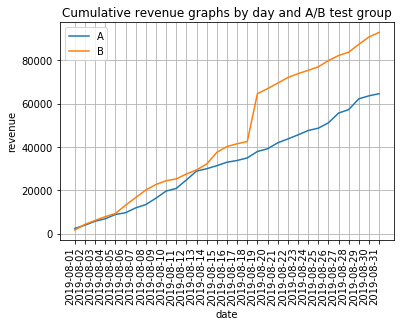

In [23]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cumulative revenue graphs by day and A/B test group')
plt.ylabel('revenue')
plt.xlabel('date')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.show()

Revenue is rising steadily throughout the whole test. That's a good sign.The both groups see spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

**Plotting average purchase size by group and dividing cumulative revenue by the cumulative number of orders:**

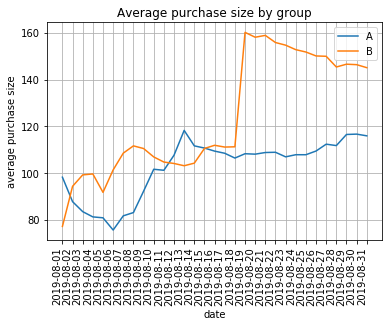

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.title('Average purchase size by group')
plt.ylabel('average purchase size')
plt.xlabel('date')
plt.grid()
plt.show()

Average purchase size becomes steady by the end of the test. It stabilizes for group A and keeps on falling for group B. The surge in group B in the first two third of the test may have been due to the presence of large, expensive order.

**Relative difference between the cumulative average purchase size of group B compared with that of group A:**

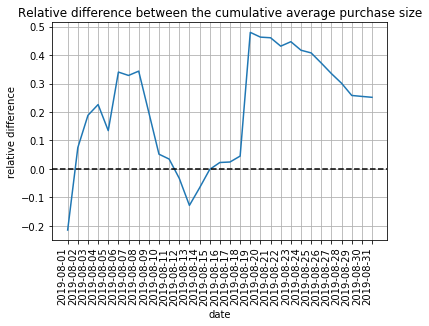

In [25]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90, ha='right')
plt.title('Relative difference between the cumulative average purchase size')
plt.ylabel('relative difference')
plt.xlabel('date')
plt.grid()
plt.show()

At different points, the difference between the segments spikes. This means there must be some big orders and outliers.

**Analyzing the cumulative conversion graph:**

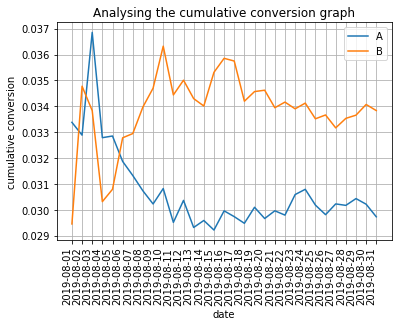

In [26]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
# plt.axis(["2019-08-01", '2019-09-01', 0, 0.015]) 
plt.xticks(rotation=90, ha='right')
plt.title('Analysing the cumulative conversion graph')
plt.ylabel('cumulative conversion')
plt.xlabel('date')
plt.grid()
plt.show()

From the above graph, we can say that our data is not reliable.

**Plotting a relative difference graph for the cumulative conversion rates:**

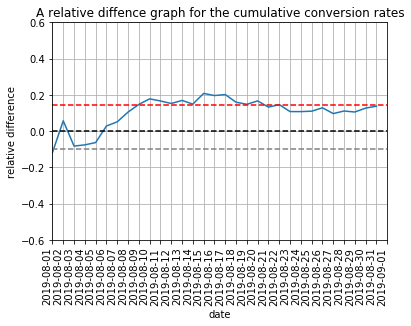

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
# plt.legend()
line = (mergedCumulativeConversions.query('date > "2019-08-10"')['conversionB']/mergedCumulativeConversions.query('date > "2019-08-10"')['conversionA']-1).mean()

plt.axhline(y=line, color='red', linestyle='--');
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.title('A relative diffence graph for the cumulative conversion rates')
plt.ylabel('relative difference')
plt.xlabel('date')
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.show()

At the beginning of the test, group B was unstable, but then it suddenly took the lead. Then its conversion was stable.

**Histogram of order price distribution:**

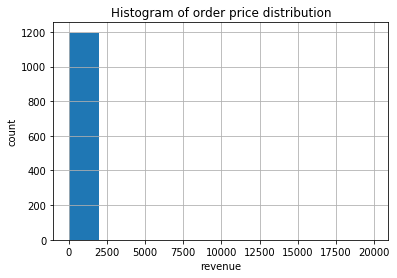

In [28]:
plt.hist(orders['revenue'])
plt.title('Histogram of order price distribution')
plt.ylabel('count')
plt.xlabel('revenue')
plt.grid()
plt.show()

Majority of the revenues are less than 2500 dollars.

**Plotting a scatter chart of order prices:**

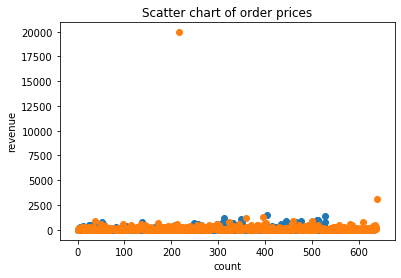

In [29]:
a_x_values = pd.Series(range(0, len(orders['revenue'][orders.group == "A"])))
b_x_values = pd.Series(range(0, len(orders['revenue'][orders.group == "B"])))
plt.scatter(a_x_values, orders['revenue'][orders.group == "A"])
plt.scatter(b_x_values, orders['revenue'][orders.group == "B"])
plt.title('Scatter chart of order prices')
plt.xlabel('count')
plt.ylabel('revenue')
plt.show()

Based on the scatter plot, we can set the limit for abnormal orders above 2000 dollars. However, the most extreme 1-5% of observed values are filtered out.

**Calculation of the 95th and 99th percentiles of order prices:**

In [30]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


No more than 5% of orders cost more than 435.54 dollars, and no more than 1% cost more than 900.904 dollars.

**Finding the number of orders per user:**

In [31]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head())

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


There are users with 5, 8, 9 and 11 orders. 

**Plotting a distribution histogram with the number of orders per user:**

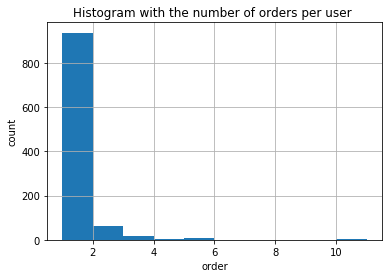

In [32]:
plt.hist(ordersByUsers['orders'])
plt.title('Histogram with the number of orders per user ')
plt.ylabel('count')
plt.xlabel('order')
plt.grid()
plt.show()

Most of the customers placed only one order. However, a significant share placed two orders.

**Plotting a scatter chart with the number of orders per user:**

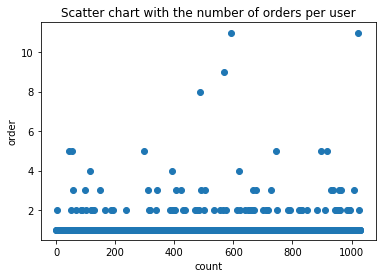

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Scatter chart with the number of orders per user')
plt.xlabel('count')
plt.ylabel('order')
plt.show()

There are indeed a lot of users with two to four orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

**Calculation of 95th and 99th percentiles for the number of orders per user:**

In [34]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Not more than 5% of users placed more than 2 orders.Thus, it would be reasonable to set 2 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

**Finding the statistical significance of differences in conversion rate and order size between the groups, using the "raw" data:**

**Hypothsis formulation:**

- Null Hypothesis (H_0) : Based on raw data, there is not a statistically significance difference in conversion between groups A and B.


- Alternative hypothesis (H_1) : Based on raw data, there is a statistically significance difference in conversion between groups A and B.

**Why are we using the mannwhitneyu method:**
When our data contains big (compared to the normal distribution) outliers, algebraic metrics don't work very well. We look at a test based on a structural approach, or a nonparametric test.

This test was originally designed by Frank Wilcoxon for small dependent samples in 1945. In 1947 Henry Mann and Donald Whitney adjusted it for independent samples. The method that we will use for A/B testing is called st.mannwhitneyu() (the Mann-Whitney U test).

The key idea behind the test is to rank two samples in ascending order and compare the ranks of values that appear in both samples. If the differences between their ranks are the same from sample to sample, this means the shift is typical. That means some values were simply added, causing the rest to shift.

Nontypical shifts mean that a real change occurred. The sum of such shifts in rank is the value of the criterion. The higher it is, the higher the probability that the distributions of the two samples differ.

The probabilities of getting various values from a Mann-Whitney test have been calculated theoretically, which makes it possible for us to conclude there is or isn't a difference for whatever significance level was set.

Nonparametric methods are useful because they do not make assumptions about how the data is distributed (so we don't have to estimate the distribution's parameters). Such methods are often used when it's difficult (or even impossible) to estimate parameters because of a large number of outliers.

In [35]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


The first row of the output gives us the p-value, 0.008, which is smaller than 0.05. So we reject the null hypothesis that there's a statistically significant difference in conversion between the groups. But the relative gain of group B is 13.8%.

**Finding the relative difference in average order size between the groups:**

**Hypothsis formulation:**

- Null Hypothesis (H_0) : Based on raw data, average order size differs between the groups.


- Alternative hypothesis (H_1) : Based on raw data, average order size does not differ between the groups.

In [36]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.346
0.252


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. The average order size for group B is much bigger than it is for group A.

**Finding the total number of anomalous users using the shape() method:**

In [37]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 2000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorId, dtype: int64
(22,)


We have 22 anomalous users in total.

**Calculating the statistical significance of the differences in conversion between the groups, using filtered data:**

**Hypothsis formulation:**

- Null Hypothesis (H_0) : Based on filtered data, there is not a statistically significance difference in conversion between groups A and B.


- Alternative hypothesis (H_1) : Based on filtered data, there is a statistically significance difference in conversion between groups A and B.

In [38]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.166


The results for conversion almost didn't change.

**Statistical significance of the difference in average order size between the groups using the filtered data:**

**Hypothsis formulation:**

- Null Hypothesis (H_0) : Based on filtered data, average order size differs between the groups.


- Alternative hypothesis (H_1) : Based on filtered data, average order size does not differ between the groups.

In [39]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.317
-0.098


The p-value slightly reduced, but now the difference between the segments is 9% loss instead of 25.2%.

Our general conclusions from the test didn't change, this problem demonstrates clearly how anomalies can affect A/B test results.Here are the facts:
-  Neither raw nor filtered data did not reveal any statistically significant differences in conversion between the groups.
-  Neither raw nor filtered data did not reveal any statistically significant differences in average order size between the groups.
-  Based on these facts, we can conclude that the test is unsuccessful and should be stopped.

<a id='the_destination4'></a>
# Step 3. Overall Conclusion:

Overall we can conclude that
-  In the "hypotheses" dataset, there are 9 entries and one columns. There are no missing values and duplicate values in the "hypotheses" dataset.
-  In the "orders" dataset, there are 1197 entries and five columns. Columns name are transactionId, visitorId, date, revenue and group.There are no missing values and duplicate values in the "orders" dataset.
-  In the "visits" dataset, there are 62 entries and three columns named date, group, visits. There are no missing values and duplicate values in the "visits" dataset.
-  In the "orders" and "visits" dataset, "date" column was object type. I converted both from object to datetime.strptime datatype.
-  RICE gives the more promising hypotheses are "Add a subscription form to all the main pages. This will help you compile a mailing list", "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size", "Add two new channels for attracting traffic. This will bring 30% more users" and "Show banners with current offers and sales on the main page. This will boost conversion".
-  We calculated for the RICE and ICE for prioritizing hypotheses. We see after calculating RICE the hpothesis "Add a subscription form to all the main pages. This will help you compile a mailing list" is in the first place. That's because of the Reach parameter is 10 while the other hypotheses have lower values.
-  Revenue is rising steadily throughout the whole test. That's a good sign.The both groups see spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.
-  Average purchase size becomes steady by the end of the test. It stabilizes for group A and keeps on falling for group B. The surge in group B in the first two third of the test may have been due to the presence of large, expensive order.
-  At different points, the difference between the segments spikes. This means there must be some big orders and outliers.
-  Majority of the revenues are less than 2500 dollars.
-  Based on the scatter plot, we can set the limit for abnormal orders above 2000 dollars. However, the most extreme 1-5% of observed values are filtered out.
-  No more than 5% of orders cost more than 435.54 dollars, and no more than 1% cost more than 900.904 dollars.
-  There are users with 5, 8, 9 and 11 orders. 
-  Most of the customers placed only one order. However, a significant share placed two orders.
-  Not more than 5% of users placed more than 2 orders.Thus, it would be reasonable to set 2 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.
-  The first row of the output gives us the p-value, 0.008, which is smaller than 0.05. So we reject the null hypothesis that there's a statistically significant difference in conversion between the groups. But the relative gain of group B is 13.8%.
-  The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. The average order size for group B is much bigger than it is for group A.
-  We have 22 anomalous users in total.
-  Neither raw nor filtered data did not reveal any statistically significant differences in conversion and average order size between the groups. So we can stop and move on to the next hypothesis.